**Time Series analysis with Python**

Time series analysis is dealing with date and time index points in the data frame.This code will help to analyze data with respect to date and time. I am using historical data of Reliance Global Group Inc ( RELI ).

In [1]:
#import libaries
import pandas as pd
#load data
from google.colab import files
uploaded = files.upload()

Saving RELI.csv to RELI.csv


When reading the CSV file, sometimes there are spaces after delimiter, to remove them make sure to use ‘skipinitialspace=True’ while reading the CSV file.

In [6]:
#reading the csv file and save it to data variable
data = pd.read_csv('RELI.csv', skipinitialspace=True)

#view the data up to 5 rows
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/22/2021,$0.0689,319702,$0.067,$0.0722,$0.0623
1,01/21/2021,$0.067,528345,$0.068,$0.069,$0.06
2,01/20/2021,$0.068,247367,$0.07,$0.07,$0.067
3,01/19/2021,$0.0685,137833,$0.075,$0.075,$0.067
4,01/15/2021,$0.07,152835,$0.077,$0.077,$0.0668


Parsing date column from string to date

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

As there are dollar sign in Close, Open, High, Low columns. This is not efficient for numerical calculation. So remove dollar sign

In [8]:
#removing dollar sign 
data['Close/Last'] = data['Close/Last'].str.replace('$', '')
data['Open'] = data['Open'].str.replace('$', '')
data['High'] = data['High'].str.replace('$', '')
data['Low'] = data['Low'].str.replace('$', '')
#view updated dataframe
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-01-22,0.0689,319702,0.067,0.0722,0.0623
1,2021-01-21,0.067,528345,0.068,0.069,0.06
2,2021-01-20,0.068,247367,0.07,0.07,0.067
3,2021-01-19,0.0685,137833,0.075,0.075,0.067
4,2021-01-15,0.07,152835,0.077,0.077,0.0668


The columns that have dollar signs they are string type columnn. So we need to change it in float value for calculation.

In [9]:
#value before converting
type(data.Low[0])

str

In [10]:
#converting str values of column to float values
data["Close/Last"] = pd.to_numeric(data["Close/Last"], downcast="float")
data["Open"] = pd.to_numeric(data["Open"], downcast="float")
data["High"] = pd.to_numeric(data["High"], downcast="float")
data["Low"] = pd.to_numeric(data["Low"], downcast="float")
#to check after converting
type(data.Low[0])

numpy.float32

Sometimes when we work on time series we need date as an index. To change the default index to Date as an index we use set_index function.

In [11]:
data.set_index("Date", inplace = True)
data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-01-22,0.0689,319702,0.067,0.0722,0.0623
2021-01-21,0.0670,528345,0.068,0.0690,0.0600
2021-01-20,0.0680,247367,0.070,0.0700,0.0670
2021-01-19,0.0685,137833,0.075,0.0750,0.0670
2021-01-15,0.0700,152835,0.077,0.0770,0.0668


Sometimes we see graph changes with the date as day, week, month or even year wise. To have a such chart we are taking the mean of the column as month-wise and let’s see. We use matlotlip for visualization.

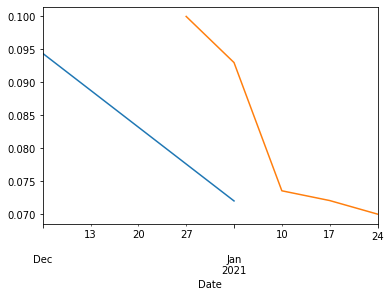

In [12]:
#Month wise
%matplotlib inline
data.Open.resample('M').mean().plot()
#Week wise - just to change it to W(Week)
data.Open.resample('W').mean().plot()